/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Error:0.28539416725563754-- a:1.69309840122,b:0.0372197540025
2.4755610602936478
0.15499718365357049


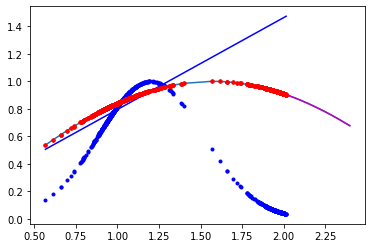

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import math
boston = load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['target'])
data = pd.concat([features,target],axis=1)
x = data['RM']
X1 = sorted(np.array(x/x.mean()))
X=X1+[i+1 for i in X1]
Y=np.sin(X)
plt.plot(X,Y)
n = int(0.8 * len(X))
x_train=X[:n]
y_train=Y[:n]
x_test=X[n:]
y_test=Y[n:]
w=np.exp([-(1.2-i)**2/(2*0.1)for i in x_train])
plt.plot(x_train, y_train, 'r.')
plt.plot(x_train,w,'b.')
def h(x,a,b):
    return a*x + b
def error(a,x,b,y,w):
    e=0
    m=len(x)
#Apply the weights multiplication for the cost function

    for i in range(m):
        e+=np.power(h(x[i],a,b)-y[i],2)*w[i]
        
    return(1/(2*m))*e
#Calculating Gradient
def step_gradient(a,x,b,y,learning_rate,w):
    grad_a=0
    grad_b=0
    m=len(x)
    for i in range(m):
        grad_a+=(2/m)*((h(x[i],a,b)-y[i])*x[i])*w[i]
        grad_b+=(2/m)*(h(x[i],a,b)-y[i])*w[i]
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    
    return a,b
def descend(initial_a,initial_b,x,y,learning_rate,iteration,w):
    a=initial_a
    b=initial_b
    for i in range(iteration):
        e=error(a,x,b,y,w)
        if i%1000==0:
            print(f"Error:{e}-- a:{a},b:{b}")
        
        a,b=step_gradient(a,x,b,y,learning_rate,w)
        
    return a,b

a=1.69309840122
b=0.0372197540025
learning_rate=0.3
iteration=100
final_a, final_b = descend(a,b,x_train,y_train, learning_rate, iteration,w)
H=[i*final_a+final_b for i in x_train]
plt.plot(x_train, y_train, 'r.',x_train,H,'b')
print(error(a,x_test,b,y_test,w))
print(error(final_a,x_test,final_b,y_test,w))
plt.plot(x_test,y_test,'m',x_train,y_train,'r.')